# 기술통계학 

# Chapter 3 자료의 정리 심화문제

In [85]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
# 한글출력 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'# '맑은 고딕'으로 설정 

---

## 27. 통계청 년도별 출생아 수 자료 정리하기

### Q. 2004년~2012년(9년) 동안의 출생아 수와 여자아이 100명당 남자아이의 비율 표로 나타내기

In [88]:
datas = {2004:[472761,108.2], 2005:[435031,107.8], 2006:[448153,107.5], 
         2007:[493183,106.2], 2008:[465891,106.4], 2009:[444849,106.4],
         2010:[470171,106.9], 2011:[471265,105.7], 2012:[484550,105.7]}

df = pd.DataFrame(datas, index=['출생아수', '출생성비'])
df

,2004,2005,2006,2007,2008,2009,2010,2011,2012
출생아수,472761.0,435031.0,448153.0,493183.0,465891.0,444849.0,470171.0,471265.0,484550.0
출생성비,108.2,107.8,107.5,106.2,106.4,106.4,106.9,105.7,105.7


#### (a) 년도별 출생아 수 막대그래프 

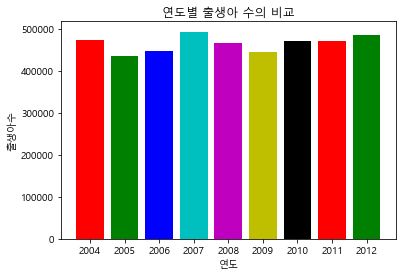

In [89]:
x = df.columns
y = df.loc['출생아수',:].values

colors = ['r','g','b','c','m','y','k']

plt.bar(x, y, color=colors)
plt.title('연도별 출생아 수의 비교')
plt.xlabel('연도')
plt.ylabel('출생아수')
plt.xticks(x)  #x축 레이블 출력        
plt.show()

#### (b) 여아, 남아 출생아수 구분하여 꺾은선 그래프 나타내기

#### 여아, 남아 출생아수

In [15]:
total = df.loc['출생아수',:].values  # 출생아수 행 전체 = df.iloc[0]
rate  = df.loc['출생성비',:].values  # 출생성비 행 전체 = = df.iloc[1]

#여아 출생아수: 여아(f), 남아(m)
# f + m = total, f : m = 100 : rate 
# f = 100 * total / (100 + rate)
# m = total - f
f = [round(100*total[idx]/(100+rate[idx])) for idx, i in enumerate(total)]
m = [i - f[idx] for idx, i in enumerate(total)]
df.loc['여아',:] = f
df.loc['남아',:] = m
df

,2004,2005,2006,2007,2008,2009,2010,2011,2012
출생아수,472761.0,435031.0,448153.0,493183.0,465891.0,444849.0,470171.0,471265.0,484550.0
출생성비,108.2,107.8,107.5,106.2,106.4,106.4,106.9,105.7,105.7
여아,227071.0,209351.0,215977.0,239177.0,225722.0,215528.0,227246.0,229103.0,235561.0
남아,245690.0,225680.0,232176.0,254006.0,240169.0,229321.0,242925.0,242162.0,248989.0


#### 여아, 남아 출생아수 꺽은선 그래프

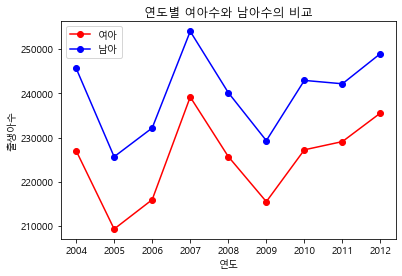

In [16]:
plt.plot(x, f, 'o', linestyle='-', color='r')
plt.plot(x, m, 'o', linestyle='-', color='b')
plt.title('연도별 여아수와 남아수의 비교')
plt.xlabel('연도')
plt.ylabel('출생아수')
plt.xticks(x)  #x축 레이블 출력     
plt.legend(['여아','남아'])
plt.show()

#### DataFrame 행, 열 바꾸기

In [17]:
df = df.transpose()  # 행, 열 변환
df

,출생아수,출생성비,여아,남아
2004,472761.0,108.2,227071.0,245690.0
2005,435031.0,107.8,209351.0,225680.0
2006,448153.0,107.5,215977.0,232176.0
2007,493183.0,106.2,239177.0,254006.0
2008,465891.0,106.4,225722.0,240169.0
2009,444849.0,106.4,215528.0,229321.0
2010,470171.0,106.9,227246.0,242925.0
2011,471265.0,105.7,229103.0,242162.0
2012,484550.0,105.7,235561.0,248989.0


---

## 28. 500개 측정값 조사 결과 자료 정리하기

### Q. 500개 측정값 조사 결과에 대한 도수분포표와 그래프 완성하기

#### (a). 도수분포표 완성

In [92]:
k = 8        # 계급수
start = 0.5  #계급 시작값
step  = 4    #계급 간격
bins = [ start +i*step for i in range(k)]  # np.arange(start, 32, step=step)  #계급
print(bins)

#계급간격
index = [ str(bins[i])+' ~ '+str( bins[i+1] if i<(k-1) else bins[i]+step ) 
           for i in range(k)]  
#도수
datas = [25,55,60,90,115,85,50,20]

# 도수분포표 만들기
df = pd.DataFrame(datas, index=index, columns=['도수'])
df.index.name = '계급간격'

#,'상대도수','누적도수','누적상대도수','계급값']
df['상대도수'] = [datas[x]/sum(datas) for x in range(k)]
df['누적도수'] = [sum([datas[i] for i in range(x+1)]) for x in range(k)]
val2 = df['상대도수'].values
df['누적상대도수'] = [sum([val2[i] for i in range(x+1)]) for x in range(k)]
df['계급값'] = [( bins[i]+( bins[i+1] if i<(k-1) else bins[i]+step ))/2 
                                 for i in range(k)]  

#df.loc['합계'] = df.iloc[:,:2].sum(axis=0, skipna=True)
df.loc['합계'] = [sum(datas),sum(val2),'','','']
df


[0.5, 4.5, 8.5, 12.5, 16.5, 20.5, 24.5, 28.5]


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
0.5 ~ 4.5,25,0.05,25,0.05,2.5
4.5 ~ 8.5,55,0.11,80,0.16,6.5
8.5 ~ 12.5,60,0.12,140,0.28,10.5
12.5 ~ 16.5,90,0.18,230,0.46,14.5
16.5 ~ 20.5,115,0.23,345,0.69,18.5
20.5 ~ 24.5,85,0.17,430,0.86,22.5
24.5 ~ 28.5,50,0.10,480,0.96,26.5
28.5 ~ 32.5,20,0.04,500,1,30.5
합계,500,1.00,,,


#### (b). 도수히스토그램과 누적상대도수히스토그램 그리기

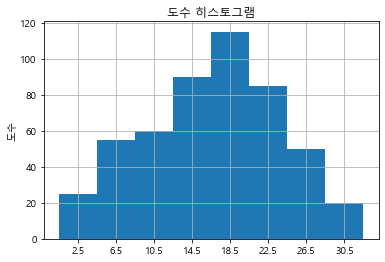

In [19]:
# 도수히스토그램
x = df['계급값'].values[:k]
y = df['도수'].values[:k]

plt.bar(x,y, width=4)
plt.title('도수 히스토그램')
plt.ylabel('도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

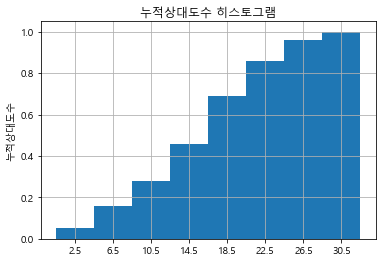

In [20]:
# 누적상대도수히스토그램
x = df['계급값'].values[:k]
y = df['누적상대도수'].values[:k]

plt.bar(x,y, width=4)
plt.title('누적상대도수 히스토그램')
plt.ylabel('누적상대도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

#### (c) 누적상대도수다각형 그리기

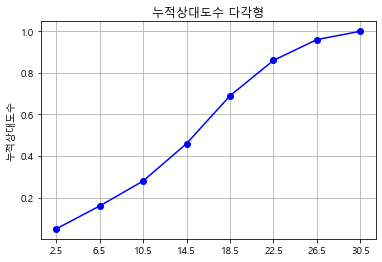

In [21]:
# 도수히스토그램
x = df['계급값'].values[:k]
y = df['누적상대도수'].values[:k]

plt.plot(x,y, 'o',linestyle='-', color='b')
plt.title('누적상대도수 다각형')
plt.ylabel('누적상대도수')
plt.xticks(ticks=x, labels=x)
plt.grid()
plt.show()

---

## 29. 통계청 연도별 우리나라 남자와 여자의 기대수명 예측

### Q. 우리나라 남자와 여자의 기대수명 그래프와 기대수명 예측하기

#### 데이터 표로 나타내기

In [23]:
df = pd.read_csv('data/data_29.csv', engine='python')
df.index = ['기대수명','남자','여자']
df.columns.name = '연도'
df

연도,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
기대수명,77.4,78.0,78.6,79.2,79.6,80.1,80.6,80.8,81.2,81.4
남자,73.9,74.5,75.1,75.7,76.1,76.5,77.0,77.2,77.7,78.0
여자,80.8,81.4,81.9,82.4,82.7,83.3,83.8,84.1,84.5,84.6


#### (a). 남자와 여자의 기대수명 꺽은선 그래프

['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012']


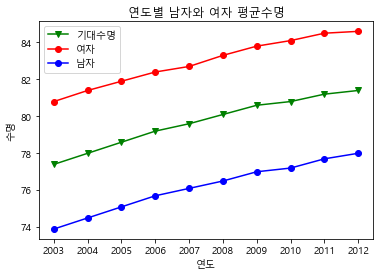

In [31]:
x = df.columns
print(list(x))
t = df.loc['기대수명', :]   # df.iloc[0]
m =  df.iloc[1]  # df.loc['남자', :] 
f =  df.iloc[2]  # df.loc['여자', :] 

plt.plot(x, t, 'v', linestyle='-', color='g', label=t)
plt.plot(x, f, 'o', linestyle='-', color='r')
plt.plot(x, m, 'o', linestyle='-', color='b')

plt.title('연도별 남자와 여자 평균수명')
plt.xlabel('연도')
plt.ylabel('수명')
plt.xticks(x)  #x축 레이블 출력     
plt.legend(['기대수명','여자','남자'])
plt.show()

#### (b). 2020년도 남자와 여자 기대수명 예측

In [83]:
#print(df['2003'])    # 2003 컬럼의 데이터:
#print(df['2003'][1])  # 남자 기대수명


# 남자의 기대수명
def get_Yvalue(year, sex):
    if sex=='남자':
        x = df[year][1]
    if sex=='여자':
        x = df[year][2]
    return x

def get_expectAge(x1, y1, x2, y2, year): 
    a, b = 0, 0
    a = (float(y2) - float(y1))/(int(x2) -int(x1))  # 기울기
    b = float(y2)    
    x = int(year) - int(x2)
    y = a * x + b  
 
    return y

x1 = '2003'
y1 = get_Yvalue(x1, '남자')
x2 = '2012'
y2 = get_Yvalue(x2, '남자')
print(x1, y1, x2,  y2)

age = get_expectAge(x1, y1, x2, y2, '2020')
print('2020년 남자 기대수명: ', age)





2003 73.9 2012 78.0
2020년 남자 기대수명:  81.64444444444445
